In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
#Read the CSV file
df = pd.read_csv("data/loan-train.csv")  

In [4]:
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [5]:
#Find the DTI
# Convert LoanAmount to full value (it's in thousands)
df["LoanAmount"] = df["LoanAmount"] * 1000  

# Compute Monthly Payment
df["Monthly_Payment"] = df["LoanAmount"] / df["Loan_Amount_Term"]

# Compute Debt-to-Income Ratio (DTI)
df["Applicant_Debt_to_Income"] = (df["Monthly_Payment"] / df["ApplicantIncome"]) * 100  
df["CoApplicant_Debt_to_Income"] = (df["Monthly_Payment"] / df["CoapplicantIncome"]) * 100  

# Handle missing or zero values to avoid division errors
df["Applicant_Debt_to_Income"] = df.apply(
    lambda row: (row["Monthly_Payment"] / row["ApplicantIncome"] * 100)
    if row["ApplicantIncome"] > 0 and row["Loan_Amount_Term"] > 0 else None,  # This is to avoid division by zero
    axis=1
)
df["CoApplicant_Debt_to_Income"] = df.apply(
    lambda row: (row["Monthly_Payment"] / row["CoapplicantIncome"] * 100)
    if row["CoapplicantIncome"] > 0 and row["Loan_Amount_Term"] > 0 else None,  # This is to avoid division by zero
    axis=1
)

In [6]:
# Show the count of missing values per column
print(df.isnull().sum())  

Loan_ID                         0
Gender                         13
Married                         3
Dependents                     15
Education                       0
Self_Employed                  32
ApplicantIncome                 0
CoapplicantIncome               0
LoanAmount                     22
Loan_Amount_Term               14
Credit_History                 50
Property_Area                   0
Loan_Status                     0
Monthly_Payment                36
Applicant_Debt_to_Income       36
CoApplicant_Debt_to_Income    292
dtype: int64


In [7]:
# Fill missing numerical values with the median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing categorical values with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

/var/folders/r7/xg2_05q53jl_7z8_mswtr4pw0000gn/T/ipykernel_84048/441540449.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [8]:
# Show the count of missing values per column. (Verify)
print(df.isnull().sum())  

Loan_ID                       0
Gender                        0
Married                       0
Dependents                    0
Education                     0
Self_Employed                 0
ApplicantIncome               0
CoapplicantIncome             0
LoanAmount                    0
Loan_Amount_Term              0
Credit_History                0
Property_Area                 0
Loan_Status                   0
Monthly_Payment               0
Applicant_Debt_to_Income      0
CoApplicant_Debt_to_Income    0
dtype: int64


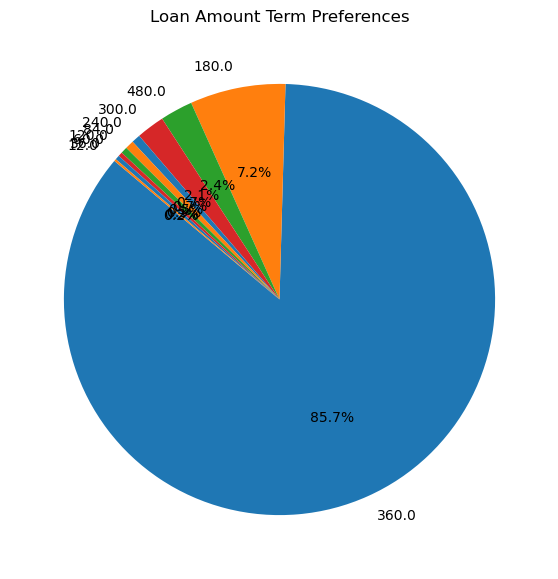

In [9]:
#Pie Chart of Loan Amount Term Preference:

import matplotlib.pyplot as plt

# Count the occurrences of each loan term
loan_term_counts = df['Loan_Amount_Term'].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(loan_term_counts, labels=loan_term_counts.index, autopct='%1.1f%%', startangle=140, colors=['#1f77b4','#ff7f0e','#2ca02c','#d62728'])

# Title
plt.title("Loan Amount Term Preferences")

# Show chart
plt.show()

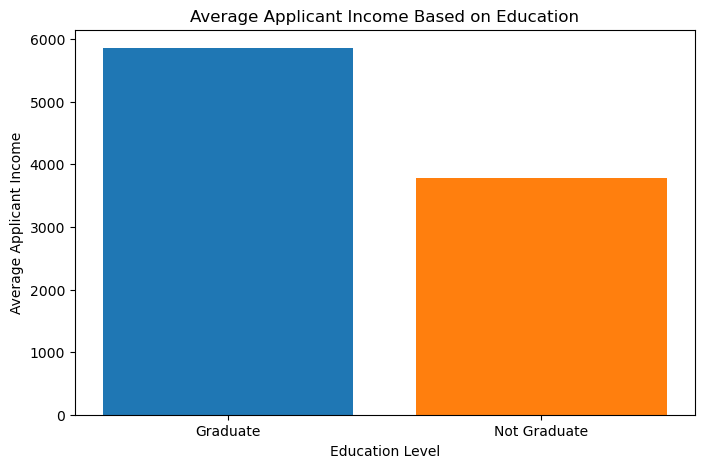

In [10]:
#Create a Chart that shows the Average Applicant income based on education

import matplotlib.pyplot as plt

# Group by Education and calculate average ApplicantIncome
income_by_education = df.groupby('Education')['ApplicantIncome'].mean()

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(income_by_education.index, income_by_education.values, color=['#1f77b4', '#ff7f0e'])

# Labels and title
plt.xlabel("Education Level")
plt.ylabel("Average Applicant Income")
plt.title("Average Applicant Income Based on Education")
plt.xticks(rotation=0)

# Show chart
plt.show()

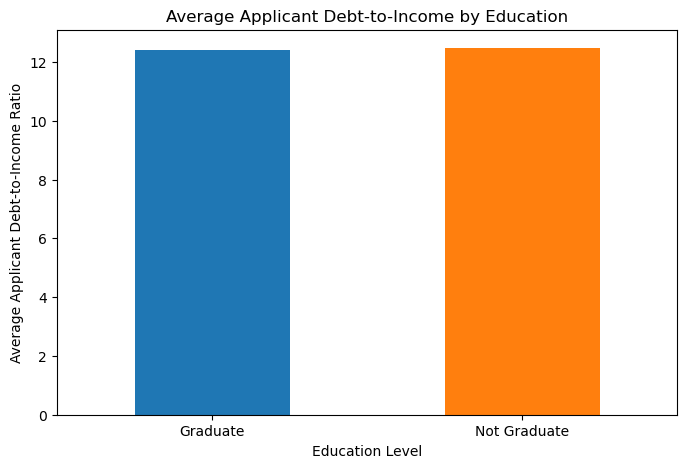

In [11]:
# Create a graph that shows the relation between the DTI and Education Level

# Check if Education column exists because of code running issues
if 'Education' in df.columns:
    # Group by Education and calculate mean debt-to-income ratio
    avg_debt_income = df.groupby('Education')['Applicant_Debt_to_Income'].mean()

    # Plot bar chart
    plt.figure(figsize=(8, 5))
    avg_debt_income.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])

    # Labels and title
    plt.xlabel("Education Level")
    plt.ylabel("Average Applicant Debt-to-Income Ratio")
    plt.title("Average Applicant Debt-to-Income by Education")

    plt.xticks(rotation=0)
    plt.show()
else:
    print("Education column not found. Ensure it's correctly labeled.")

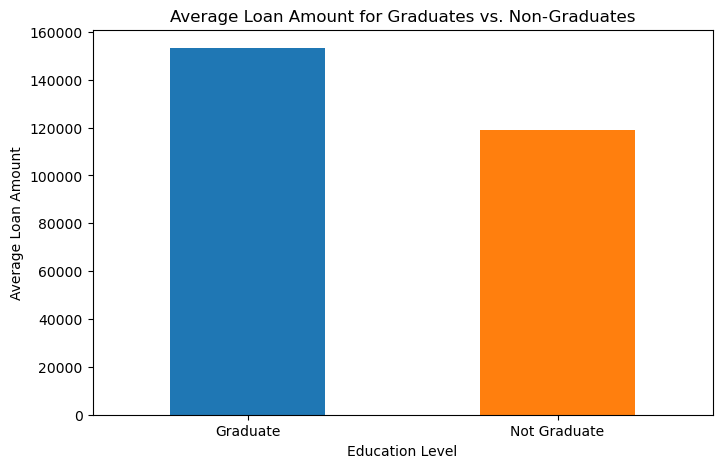

In [12]:
# Crate a graph that shows the average loan for graduates vs non graduates

import matplotlib.pyplot as plt

# Check if Education column exists
if 'Education' in df.columns and 'LoanAmount' in df.columns:
    # Group by Education and calculate mean LoanAmount
    avg_loan_amount = df.groupby('Education')['LoanAmount'].mean()

    # Plot bar chart
    plt.figure(figsize=(8, 5))
    avg_loan_amount.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])

    # Labels and title
    plt.xlabel("Education Level")
    plt.ylabel("Average Loan Amount")
    plt.title("Average Loan Amount for Graduates vs. Non-Graduates")

    plt.xticks(rotation=0)  # Keep labels horizontal
    plt.show()
else:
    print("Ensure 'Education' and 'LoanAmount' columns exist in the dataset.")

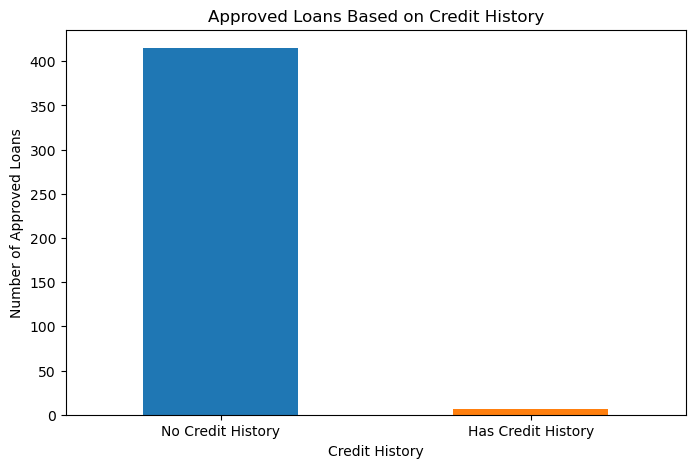

In [13]:
#Create a graph that shows Approved loans based on Credit History
import matplotlib.pyplot as plt

# Check if required columns exist
if 'Credit_History' in df.columns and 'Loan_Status' in df.columns:
    # Filter for only approved loans (Loan_Status = 'Y')
    approved_loans = df[df['Loan_Status'] == 'Y']

    # Count number of approved loans per Credit_History category
    approved_counts = approved_loans['Credit_History'].value_counts()

    # Plot bar chart
    plt.figure(figsize=(8, 5))
    approved_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])

    # Labels and title
    plt.xlabel("Credit History")
    plt.ylabel("Number of Approved Loans")
    plt.title("Approved Loans Based on Credit History")

    # Formatting x-axis
    plt.xticks(ticks=[0, 1], labels=["No Credit History", "Has Credit History"], rotation=0)

    plt.show()
else:
    print("Ensure 'Credit_History' and 'Loan_Status' columns exist in the dataset.")

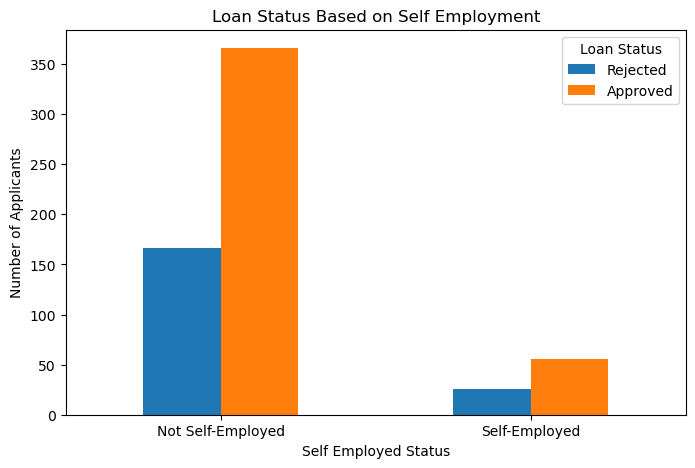

In [14]:
# Show the relation between loan status and self employment
import matplotlib.pyplot as plt

# Check if required columns exist
if 'Self_Employed' in df.columns and 'Loan_Status' in df.columns:
    # Count the number of approved ('Y') and rejected ('N') loans for self-employed and non-self-employed applicants
    loan_status_counts = df.groupby(['Self_Employed', 'Loan_Status']).size().unstack()

    # Plot grouped bar chart
    loan_status_counts.plot(kind='bar', figsize=(8, 5), color=['#1f77b4', '#ff7f0e'])

    # Labels and title
    plt.xlabel("Self Employed Status")
    plt.ylabel("Number of Applicants")
    plt.title("Loan Status Based on Self Employment")

    # Formatting x-axis
    plt.xticks(ticks=[0, 1], labels=["Not Self-Employed", "Self-Employed"], rotation=0)

    # Legend
    plt.legend(title="Loan Status", labels=["Rejected", "Approved"])

    plt.show()
else:
    print("Ensure 'Self_Employed' and 'Loan_Status' columns exist in the dataset.")

In [15]:
#Use Get Dummies to work with categorical values:

available_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
existing_columns = [col for col in available_columns if col in df.columns]

df = pd.get_dummies(df, columns=existing_columns, drop_first=True)

In [16]:
df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Monthly_Payment,Applicant_Debt_to_Income,CoApplicant_Debt_to_Income,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,128000.0,360.0,1.0,Y,365.277778,8.843264,16.875326,True,False,False,False,False,True
1,LP001003,1,4583,1508.0,128000.0,360.0,1.0,N,355.555556,7.758140,23.577955,True,True,False,False,False,False
2,LP001005,0,3000,0.0,66000.0,360.0,1.0,Y,183.333333,6.111111,16.875326,True,True,False,True,False,True
3,LP001006,0,2583,2358.0,120000.0,360.0,1.0,Y,333.333333,12.904891,14.136274,True,True,True,False,False,True
4,LP001008,0,6000,0.0,141000.0,360.0,1.0,Y,391.666667,6.527778,16.875326,True,False,False,False,False,True


In [17]:
#Separate the target variable (Loan_Status) from the input features.
X = df.drop(columns=['Loan_Status'])  # Features
y = df['Loan_Status']  # Target variable

In [18]:
# remove Loan_ID if present and the + sign from "dependents" column understanding that 3 could be also "or more"
X = X.drop(columns=['Loan_ID'], errors='ignore')  
X['Dependents'] = X['Dependents'].replace('3+', 3).astype(float)

In [19]:
#Normalize/Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalize feature values


In [20]:
#Coverting the data to floats and data instead of strings and avoiding errors by repeating some 
#of the code as the debugging requested it.

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# 'Loan_Status' is the target variable
y = df['Loan_Status'].map({'Y': 1, 'N': 0})  # Convert 'Y'/'N' to 1/0
X = df.drop(columns=['Loan_Status'])  # Drop target column

X = X.drop(columns=['Loan_ID'], errors='ignore')  

X['Dependents'] = X['Dependents'].replace('3+', 3).astype(float)

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Monthly_Payment,Applicant_Debt_to_Income,CoApplicant_Debt_to_Income,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849,0.0,128000.0,360.0,1.0,365.277778,8.843264,16.875326,True,False,False,False,False,True
1,1.0,4583,1508.0,128000.0,360.0,1.0,355.555556,7.758140,23.577955,True,True,False,False,False,False
2,0.0,3000,0.0,66000.0,360.0,1.0,183.333333,6.111111,16.875326,True,True,False,True,False,True
3,0.0,2583,2358.0,120000.0,360.0,1.0,333.333333,12.904891,14.136274,True,True,True,False,False,True
4,0.0,6000,0.0,141000.0,360.0,1.0,391.666667,6.527778,16.875326,True,False,False,False,False,True


Train the Model using Logistic Regression


In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



/Users/paolalondono/miniconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train the model using Random Forest


In [89]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced",max_depth= 30, min_samples_split=2,
                                  min_samples_leaf=1, max_features="sqrt",random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.7804878048780488
              precision    recall  f1-score   support

           0       0.86      0.44      0.58        43
           1       0.76      0.96      0.85        80

    accuracy                           0.78       123
   macro avg       0.81      0.70      0.72       123
weighted avg       0.80      0.78      0.76       123



Train the model using Decision Tree


In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(class_weight="balanced",max_depth=3,min_samples_split=20,min_samples_leaf=1,
                                  criterion='entropy',random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7967479674796748
              precision    recall  f1-score   support

           0       0.95      0.44      0.60        43
           1       0.77      0.99      0.86        80

    accuracy                           0.80       123
   macro avg       0.86      0.71      0.73       123
weighted avg       0.83      0.80      0.77       123



Tunning the Decision Tree Classifier


In [94]:
# Train a tuned Decision Tree
dt_tuned = DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=42)
dt_tuned.fit(X_train, y_train)

# Predict
y_pred_dt_tuned = dt_tuned.predict(X_test)

# Evaluate
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt_tuned))
print(classification_report(y_test, y_pred_dt_tuned))

Tuned Decision Tree Accuracy: 0.7967479674796748
              precision    recall  f1-score   support

           0       0.95      0.44      0.60        43
           1       0.77      0.99      0.86        80

    accuracy                           0.80       123
   macro avg       0.86      0.71      0.73       123
weighted avg       0.83      0.80      0.77       123



Graph of Decision Tree


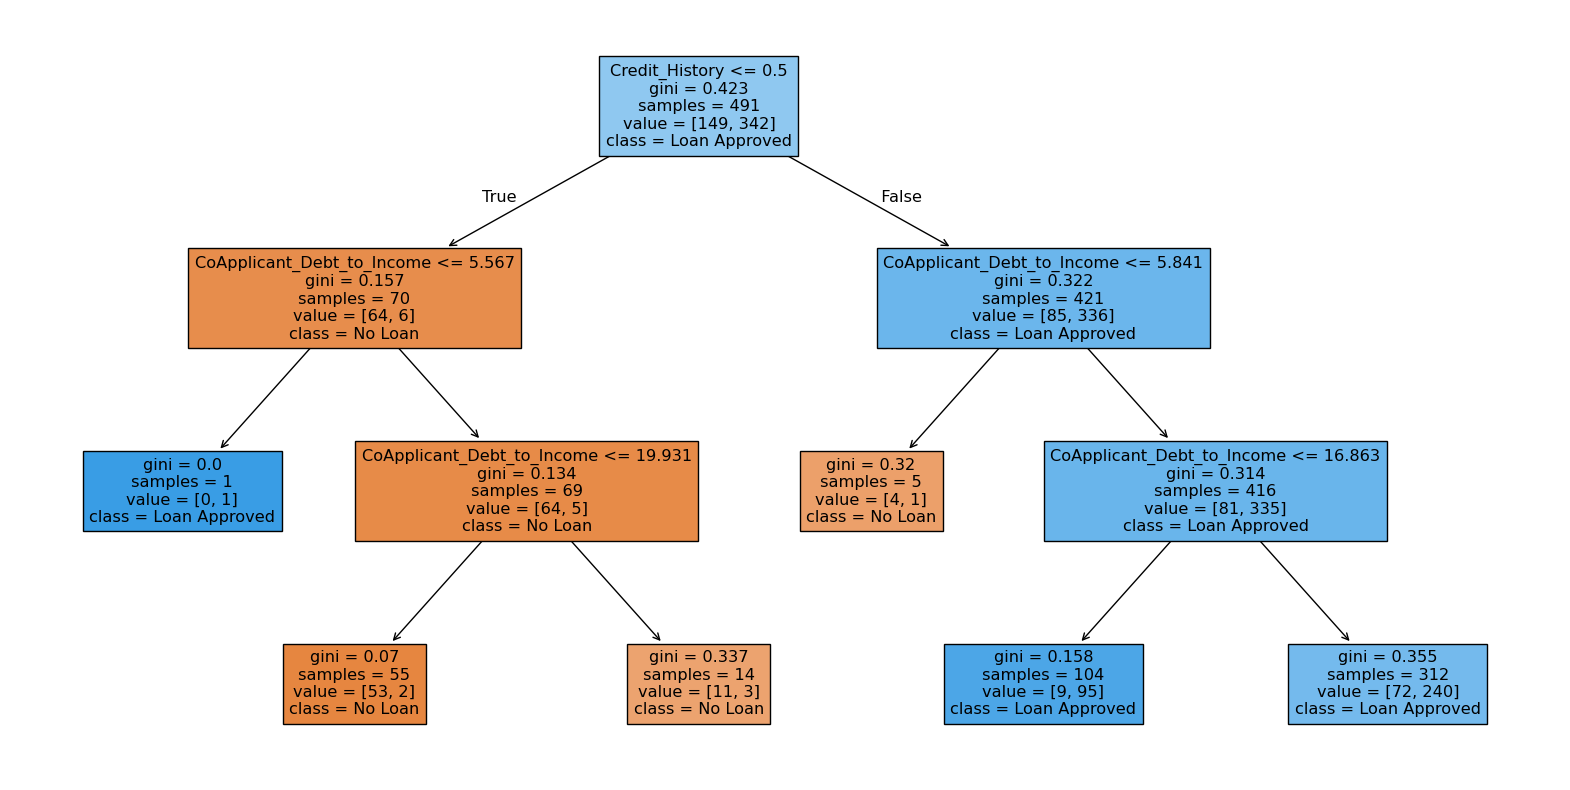

In [48]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_tuned, feature_names=X.columns, class_names=["No Loan", "Loan Approved"], filled=True)
plt.show()